<a href="https://colab.research.google.com/github/AIREheart/Computational-Neuroscience/blob/main/assignments/syde552_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYDE 552 Assignment 2: Vision
### Due Monday, February 19, 11:59pm
### Value: 15% of total marks for the course

This assignment covers the mammilian vision system, including both questions about the biology itself and constructing computational models based on Regression and Convolutional Neural Networks.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. The Vision System

The purpose of this part of the assignment is to test your knowledge of the brain’s visual system and the relationship between neurobiological features and computational properties. The best answers will discuss both function and anatomy, and will draw on specific anatomical examples to support theoretical claims. You are encouraged to discuss answers with your classmates, consult the slides notes, or use external resources -- but your answers must be your own! In particular, read the Kandel et al. chapters listed on the slides. Expect to write around 5 sentences for each 1 point.

**1.a) [2 marks]** The neurons in different parts of the brain are sensitive to different things, and can be thought of as different feature detectors.  For each of the types of neurons listed below, describe what feature they detect, their receptive fields, and how their connectivity to other neurons and/or their internal neural processes helps them to do this feature detection:
- Cones
- Sustained Ganglion Cells
- Transient Ganglion Cells
- Simple Cells

1a)
**Cones**: a photoreceptor type within the retinal circuitry that are not light-sensitive and responsible for vision in the daylight. Cones detect colors, and there are three types specified by their range of wavelength responsivity. Cones are densely packed in the fovea, or vision center with the sharpest resolution.

**Sustained ganglion cells**: a type of ganglion cell (cells responsible for transmitting neural images to the brain) accounting for temporal changes in stimuli typically over constant light intensity. Polarity and kinetically-gated, ganglion cells have multiple flavors (on/off and sustained/transient). Their composition involves a center-surround receptive field system organization where the center and surrounding regions of the ganglion fire in opposite states (e.g. ON cells fire when light shines on the center region but there is darkness on the surrounding areas). This ganglion cells spike for an extended duration(typically the entirety of their stimulus duration) in the presence of their preferred stimulus.

**Transient ganglion cells:** Similar to sustained ganglion cells, this type of ganglion cells spike for brief, initial burst brought on by the presence of their preferred stimulus. The antagonistic effects of the center surround organization can also allow for modelling the tracking of moving stimuli.

**Simple cells** : a type of orientation-selective neuron in the V1 region of the visual cortex with separation between the ON and OFF regions of their receptive fields. Activated upon detecting basic shapes (lines or edges) through the stimuli which fit the preferred orientation of stimulus of its receptive field. Simple cells are selective in their detection of object boundaries. Opposed to complex cells which contain overlapping ON/OFF fields and produce continuous responses to moving stimuli as they are less selective to object boundaries.



**1. b) [1 marks]** Describe two instances where retinotopic organization facilitates visual processing.  For each example, be sure to mention its anatomical location and discuss how retinitopy contributes to the feature detection.

1b)
Retinotopy refers to the non-random arrangement of neuronal positions and coordinates with respect to features of their receptive fields.

1. The arrangement of receptive fields in V1 (the primary area receiving sensory input from the LGN contained within the visual cortex in the occipital lobe). V1 contains a complete map of the visual field

**1. c) [2 marks]** Discuss the similarities and differences between convolutional neural networks and the visual system.

1c)
Both CNNs and the visual system contain hierarchical layers that detect and/or process different, specific features from an input


CNNs and visual system elements participate in pooling, or the reduction of information to account for the most significant features from the input - complex cells pool while simple cells do not. In addition to the local receptive fields in both, there is also translation invariance and learning processes involved.

Both CNNs and the visual system can be hijacked to conclude an erroneous output with the addition of noise or subliminal stimuli (stimuli below the threshold of conscious awareness

CNNs could be considered as mostly supervised learning while the visual system is unsupervised (or at the very least contains elements of both).

CNNs contain static inputs and do not allow for adaptation or normalization such as in visual system neurons, nor do they allow for lateral connections (which would be present in neurons and ganglia in the visual cortex).


Sources:
Kandel et al.
https://msail.github.io/post/cnn_human_visual/

# 2. Classifying Stimuli Using Regression

The retina transforms the light entering an eye into a particular set of features, which are then sent to the rest of the brain for further processing.  In this section we look at how neurons might detect patterns, and how that detection changes with different feature detectors.

The data we will use for this is the classic MNIST dataset

In [ ]:
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 92862002.04it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30682799.85it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31249226.87it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12435071.00it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



The MNIST digits are 28x28 pixels each, each pixel is a value from 0 to 255, and there are 60,000 of them.  The raw data is in `mnist.data` and the target value (i.e. the actual digit) is in `mnist.targets`.  Here are the first 24 of each:

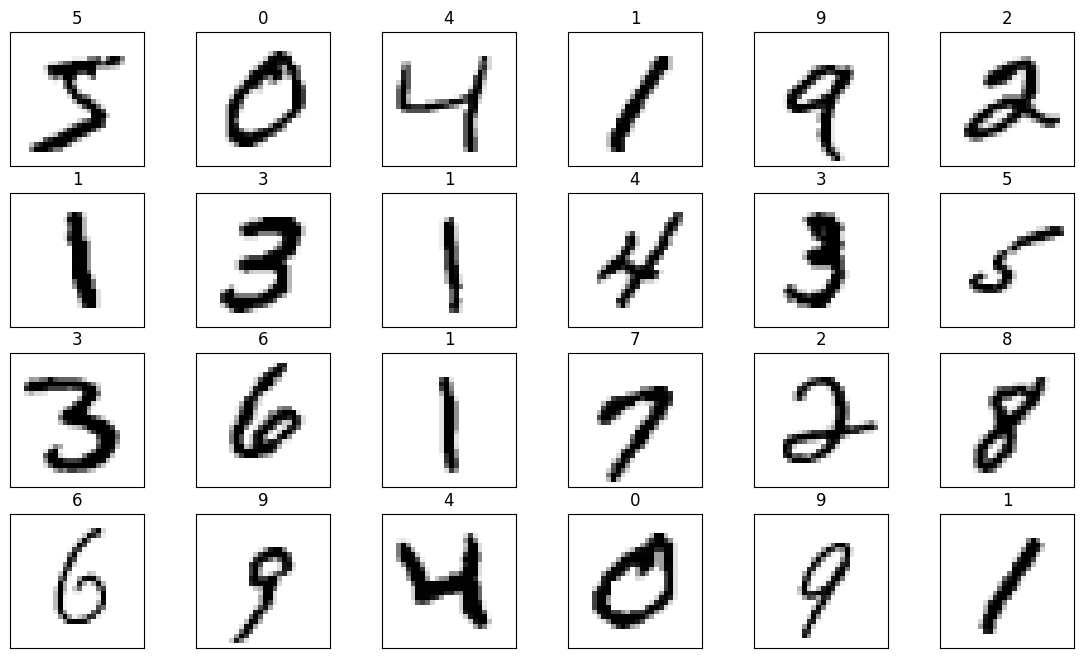

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

**2.a) [1 mark]** We can imagine the MNIST digits as 784 (28 times 28) input neurons.  We want to connect these 784 neurons to 10 output neurons, one for each digit, and see how accurately we can classify the digits.  

To find the weights in this question, we will use Ridge Regression.  `X` is the MNIST input data, divided by 255 to rescale it to between 0 and 1, and then reshaped to be a 60000x784 matrix

```
X = mnist.data.reshape((60000,28*28)).float()/255
```

The target data T is a "one-hot" representation of our outputs.  That is, instead of the desired output to be `5`, the output should be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` and if the desired output should be `0`, that would be `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.  

```
T = torch.nn.functional.one_hot(mnist.targets).float()
```

If our output is `Y=X @ W`, we need to find `W` such that `Y` is as close as possible to `T`.  For Ridge Regression, this is computed as

```
W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)
```

where `I` is an identity matrix of the correct size (`torch.eye(784).float()`) and `lambd` is the $\lambda$ parameter that stops the regression from overfitting.

When building any sort of classifier model, we generally want to create the model using one set of data, and then test it on another set of data.  Here, we will use the first 5,000 data points for creating ("training") the model, and the other 55,000 for testing:

```
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
```

Given this data, you should find `W` using *only* the `X_train` and `T_train` data.  Once you find `W` you can apply it to the `X_train` and `X_test` to get `Y_train` and `Y_test`

```
Y_train = X_train @ W
Y_test = X_test @ W
```

Finally, you can compute the accuracy by determining when the output is the correct category.  Here we will do this by counting when the largest output value in each row in `Y` is at the same spot as the largest output value in each row in `T`:

```
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
```

- Compute the training and testing accuracy when $\lambda=1$ and we use the first 5,000 data points as for training (and test on the remaining 55,000).  Report both numbers.  
- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?


In [ ]:
import torch

from torch import nn

X = mnist.data.reshape((60000,28*28)).float()/255

T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()
lambd = 1
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)



Y_train = X_train @ W
Y_test = X_test @ W


accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

print(accuracy_train)
print(accuracy_test)
print(X_train.shape)
print(X_test.shape)

tensor(0.9034)
tensor(0.8192)
torch.Size([5000, 784])
torch.Size([55000, 784])


The training accuracy is 0.9034 and the testing accuracy is slightly less at 0.8192 - we would expect the testing accuracy to be smaller than the training accuracy since the training dataset is what the neuron actually learned off of.



**2. b) [2 marks]**  Repeat part a) but vary the value of `lambd` from $10^{-5}$ to $10^5$.   You can use a `for` loop such as `for lambd in np.logspace(-5, 5, 11):`.  

- Generate a single plot that shows the training and testing accuracy.  Make sure to label your axes and the lines on the plot.  

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  
- Why does changing `lambd` affect the accuracy?  
- Why would having a large `lambd` value be good for making a biologically realistic model?

tensor(0.7538)
tensor(0.7382)
[tensor(0.9052), tensor(0.9042), tensor(0.9042), tensor(0.9032), tensor(0.9010), tensor(0.8902), tensor(0.8790), tensor(0.8504), tensor(0.7944), tensor(0.7538)]
[tensor(0.8119), tensor(0.8133), tensor(0.8151), tensor(0.8178), tensor(0.8232), tensor(0.8328), tensor(0.8391), tensor(0.8277), tensor(0.7814), tensor(0.7382)]


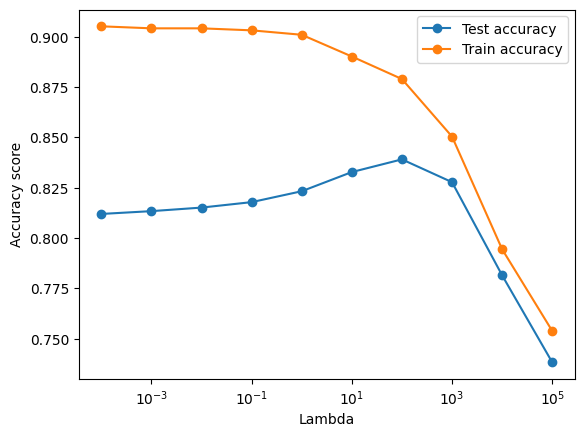

In [ ]:
import numpy as np


X = mnist.data.reshape((60000,28*28)).float()/255

T = torch.nn.functional.one_hot(mnist.targets).float()



accuracytrain = []
accuracytest = []
for lambd in np.logspace(-3, 5, 10):
    I = torch.eye(784).float()
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)


    N = 5000
    X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W


    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

    accuracytrain.append(accuracy_train)
    accuracytest.append(accuracy_test)



print(accuracy_train)
print(accuracy_test)
print(accuracytrain)
print(accuracytest)

xs = np.logspace(-4,5,10)
plt.plot(xs, accuracytest, "o-", label="Test accuracy")
plt.plot(xs, accuracytrain, "o-", label="Train accuracy")
plt.xlabel("Lambda")
plt.xscale('log')
plt.ylabel("Accuracy score")
plt.legend()
plt.show()




10^2 is the best value for lambda

Lambda, or the regularization or learning rate impacts how the machine tunes its predictions.

Lower lambdas make models too complex and run the risk of overfitting data which makes it more difficult for the system to be able to generalize new data and thus be useful for examples it has not yet been exposed to in training.

This is less ideal than having a large lambda, which on the other hand allows more generalizations to be made with respect to the training data through the means of underfitting rather than overfitting. This means that by not learning too many specifics about the training data, it has a better capacity to use its training as a reference for new data (which is more useful to living organisms which will encounter new experiences and observations throughout time and space).

**2. c) [1 mark]** The input we have used so far is not very realistic.  In real life, when we see written digits, they are under a wide range of lighting conditions. For this question, we change `X` by scaling it randomly and adding a random background brightness.

```
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000)[:,None]) + torch.rand(60000)[:,None]
```

To see what this looks like, here is how you can plot it:

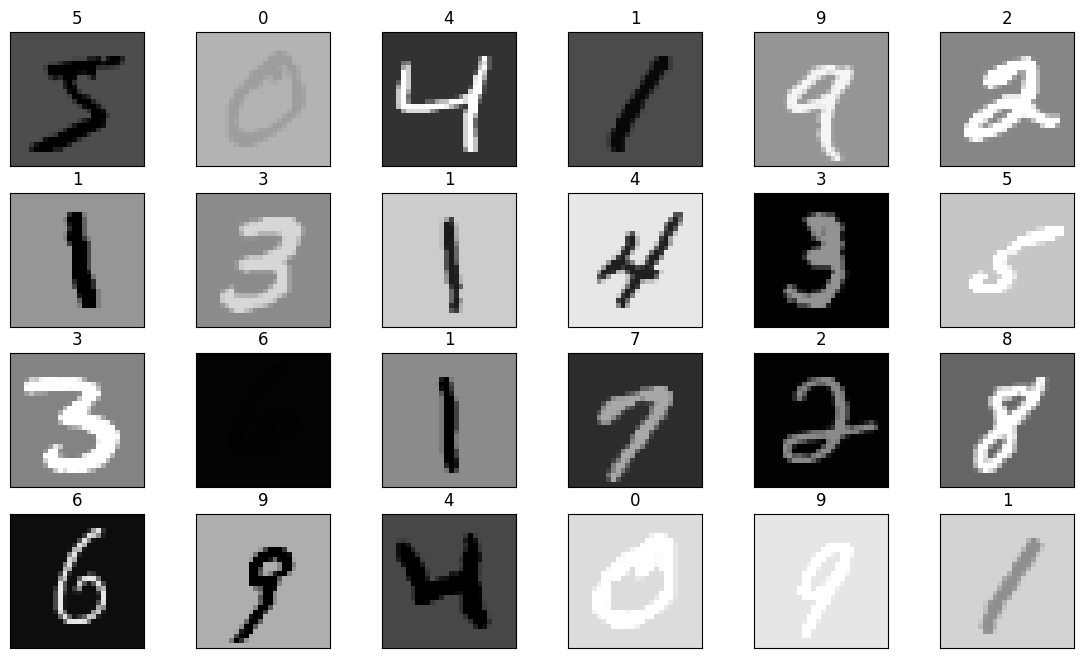

In [ ]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(X[i].reshape(28,28), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))


- Generate the same plot as in 2b) but for this new dataset.  
- Is this a harder or easier task than with the original dataset?
- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

[tensor(0.1190), tensor(0.1076), tensor(0.2282), tensor(0.4080), tensor(0.4142), tensor(0.3898), tensor(0.3412), tensor(0.2982), tensor(0.2236), tensor(0.1306)]
[tensor(0.1109), tensor(0.1001), tensor(0.1251), tensor(0.1951), tensor(0.2025), tensor(0.2103), tensor(0.2308), tensor(0.2375), tensor(0.1909), tensor(0.1172)]
tensor([[0.2701, 0.2701, 0.2701,  ..., 0.2701, 0.2701, 0.2701],
        [0.5419, 0.5419, 0.5419,  ..., 0.5419, 0.5419, 0.5419],
        [0.3111, 0.3111, 0.3111,  ..., 0.3111, 0.3111, 0.3111],
        ...,
        [0.5397, 0.5397, 0.5397,  ..., 0.5397, 0.5397, 0.5397],
        [0.2524, 0.2524, 0.2524,  ..., 0.2524, 0.2524, 0.2524],
        [0.9570, 0.9570, 0.9570,  ..., 0.9570, 0.9570, 0.9570]])
tensor([[0.0093, 0.0093, 0.0093,  ..., 0.0093, 0.0093, 0.0093],
        [0.0287, 0.0287, 0.0287,  ..., 0.0287, 0.0287, 0.0287],
        [0.6913, 0.6913, 0.6913,  ..., 0.6913, 0.6913, 0.6913],
        ...,
        [0.0614, 0.0614, 0.0614,  ..., 0.0614, 0.0614, 0.0614],
        [0.

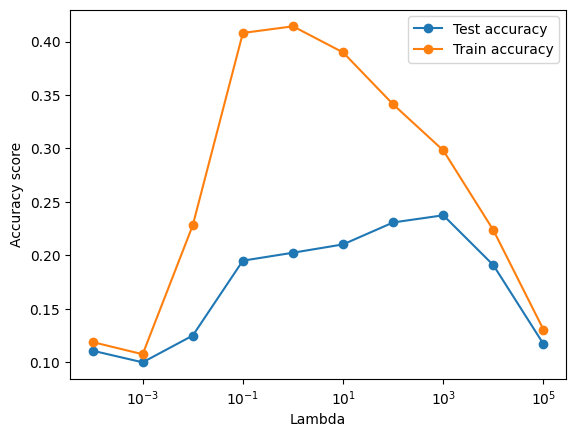

In [ ]:
#X = mnist.data.reshape((60000,28*28)).float()/255
import numpy as np


X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]


T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()


accuracytrain = []
accuracytest = []



for lambd in np.logspace(-4, 5, 10):
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)




    N = 5000
    X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing



    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W


    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

    accuracytrain.append(accuracy_train)
    accuracytest.append(accuracy_test)


print(accuracytrain)
print(accuracytest)
print(X_train)
print(X_test)

xs = np.logspace(-4,5,10)
plt.plot(xs, accuracytest, "o-", label="Test accuracy")
plt.plot(xs, accuracytrain, "o-", label="Train accuracy")
plt.xlabel("Lambda")
plt.ylabel("Accuracy score")
plt.xscale('log')
plt.legend()
plt.show()

This task is harder than the original dataset as there is much lower test accuracy than training accuracy

This data is more like that at retina cells while the original dataset is more similar to that of the ganglion.

**2. d) [1 mark]** We can think of neurons in the visual system as transforming the data in various ways.  Given the dataset in 2c), neurons might be able to transform it to look more like the origin data.

Here are three data transformations that could be applied here:

Subtracting the Mean
```
X = X-torch.mean(X, axis=1)[:,None]
```

Absolute value
```
X = torch.abs(X)
```

Normalizing
```
X = X/torch.linalg.norm(X, axis=1)[:,None]
```

- Apply all three of them (in the order shown above) to the dataset and generate the same graph as in 2b) and 2c).
- How does the performance of the network compare to that of 2b) and 2c)?
- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?
- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

[tensor(0.1032), tensor(0.9138), tensor(0.9126), tensor(0.9072), tensor(0.8878), tensor(0.8540), tensor(0.7756), tensor(0.6848), tensor(0.6280), tensor(0.6084)]
[tensor(0.1029), tensor(0.8293), tensor(0.8332), tensor(0.8394), tensor(0.8442), tensor(0.8263), tensor(0.7574), tensor(0.6655), tensor(0.6062), tensor(0.5882)]
tensor([[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
        [0.0169, 0.0169, 0.0169,  ..., 0.0169, 0.0169, 0.0169],
        [0.0135, 0.0135, 0.0135,  ..., 0.0135, 0.0135, 0.0135],
        ...,
        [0.0162, 0.0162, 0.0162,  ..., 0.0162, 0.0162, 0.0162],
        [0.0086, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.0086],
        [0.0146, 0.0146, 0.0146,  ..., 0.0146, 0.0146, 0.0146]])
tensor([[0.0167, 0.0167, 0.0167,  ..., 0.0167, 0.0167, 0.0167],
        [0.0166, 0.0166, 0.0166,  ..., 0.0166, 0.0166, 0.0166],
        [0.0141, 0.0141, 0.0141,  ..., 0.0141, 0.0141, 0.0141],
        ...,
        [0.0141, 0.0141, 0.0141,  ..., 0.0141, 0.0141, 0.0141],
        [0.

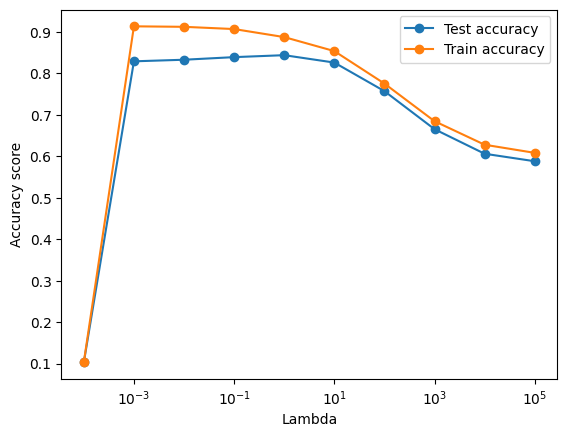

In [ ]:

X1 = mnist.data.reshape((60000,28*28)).float()/255
X1 = X1-torch.mean(X1, axis=1)[:,None]
X1 = torch.abs(X1)
X1 = X1/torch.linalg.norm(X1, axis=1)[:,None]


T = torch.nn.functional.one_hot(mnist.targets).float()

I = torch.eye(784).float()


accuracytrain = []
accuracytest = []
for lambd in np.logspace(-4, 5, 10):

    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)


    N = 5000
    X_train, X_test = X1[:N], X1[N:]  # split X into two parts for training and testing
    T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

    Y_train = X_train @ W
    Y_test = X_test @ W


    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

    accuracytrain.append(accuracy_train)
    accuracytest.append(accuracy_test)


print(accuracytrain)
print(accuracytest)
print(X_train)
print(X_test)

xs = np.logspace(-4,5,10)
plt.plot(xs, accuracytest, "o-", label="Test accuracy")
plt.plot(xs, accuracytrain, "o-", label="Train accuracy")
plt.xlabel("Lambda")
plt.ylabel("Accuracy score")
plt.xscale('log')

plt.legend()
plt.show()


The eye transforms raw data between rods and cones to the ganglia to be able to communicate the phototransduced data into an information format compatible with neuronal cells. It applies normalization to the raw data before sending it to the ganglia.

# 3. Classifying Stimuli Using Backpropogation

Regression is restricted to learning the layer of weights that produces the final output.  If we want to also learn what features are most useful for producing that output, we need a more complex learning rule, and this is typically backpropogation.  Here we will classify the same data as in question 2, and we will build up different network structures to do so.

Backpropogation tends to work best when learning on a bunch of data at the same time (a "batch").  The following code will set up the same training and testing data as in question 2, but presented in randomized batches of 1000 at a time.

```python
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)
```

In [ ]:
np.arange(5000)
np.arange(5000,10000)

array([5000, 5001, 5002, ..., 9997, 9998, 9999])

To create a neural network, we need to define what the weights are we will learn and we need to define the computation that the network will perform.  Here is the definition of a simple network that has an input of 784 values (the MNIST inputs), which go to 50 "hidden"-layer neurons, and then to the output 10 neurons.  So the network will learn to transform the 784 inputs into 50 new representations, and from those 50 features it will learn weights to create an output of 10 values (our 10 categories).  This is known as a multi-layer perceptron, or a standard neural network with a single hidden layer.

```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
```

Finally, we need to train our model.  When training, it is useful to keep track of how well the model is doing on the testing data.  Since testing the network takes time, we don't necessarily want to do it all the time.  Instead, the following code trains the network 10 times, and then records how well the network does on the training data and on the testing data.

In [ ]:
import torch

from torch import nn
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category

network = Net()

# create the learning rule
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


Given the above code, you can train your network 10 times by doing

```python
for i in range(10):
    continue_training()
```

If you want to continue training even more, you can just run that `for` loop again.

To plot the final accuracy results, you can use

```python
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()
```

**3. a) [1 mark]** Run the model above for 10 iterations (i.e. call `continue_training` 10 times).

- Plot the training and testing accuracy.  
- Is this model better or worse than the best models developed in question 2?

<ipython-input-36-85f917a8cf97>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8593999743461609
Iteration 1 Testing accuracy: 0.8529999852180481
Iteration 2 Training accuracy: 0.9031999707221985
Iteration 2 Testing accuracy: 0.885200023651123
Iteration 3 Training accuracy: 0.9165999889373779
Iteration 3 Testing accuracy: 0.8948000073432922
Iteration 4 Training accuracy: 0.9277999997138977
Iteration 4 Testing accuracy: 0.9007999897003174
Iteration 5 Training accuracy: 0.9341999888420105
Iteration 5 Testing accuracy: 0.9038000106811523
Iteration 6 Training accuracy: 0.9394000172615051
Iteration 6 Testing accuracy: 0.907800018787384
Iteration 7 Training accuracy: 0.9430000185966492
Iteration 7 Testing accuracy: 0.9097999930381775
Iteration 8 Training accuracy: 0.946399986743927
Iteration 8 Testing accuracy: 0.9115999937057495
Iteration 9 Training accuracy: 0.9495999813079834
Iteration 9 Testing accuracy: 0.9115999937057495
Iteration 10 Training accuracy: 0.9539999961853027
Iteration 10 Testing accuracy: 0.9115999937057495


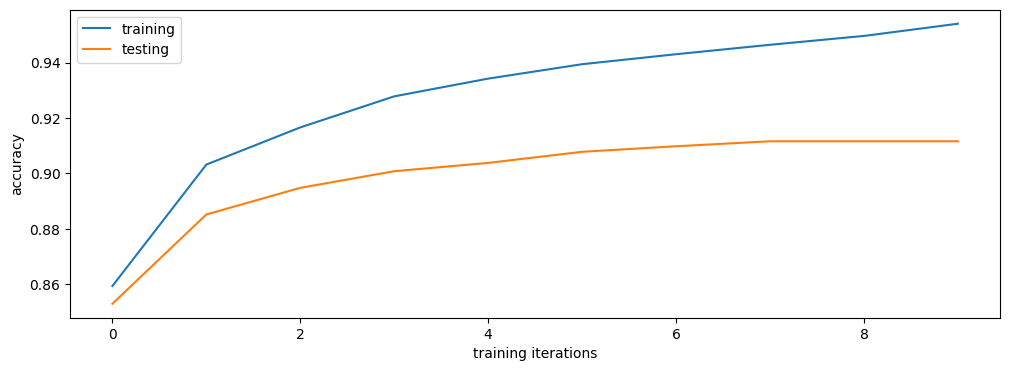

In [ ]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category

network = Net()

# create the learning rule
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

This model is better than the previously developed models.

**3. b) [1 mark]** Repeat question 3a five times.  This does not mean to run a single model for 50 iterations.  Rather, you need to reset the model and train it again.  The easiest way to do this is to recreate the network and the optimizer like this:

```python
network = Net()
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,
                      momentum=0.5)
```

- Make a plot showing the 5 different training accuracies and 5 different testing accuracies
- Also show the average training and testing accuracy on the plot.
- Each of the 5 models should show slightly different accuracies.  Why is this the case?


<ipython-input-46-26d6cecd79c1>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8641999959945679
Iteration 1 Testing accuracy: 0.8632000088691711
Iteration 2 Training accuracy: 0.901199996471405
Iteration 2 Testing accuracy: 0.8884000182151794
Iteration 3 Training accuracy: 0.9196000099182129
Iteration 3 Testing accuracy: 0.8981999754905701
Iteration 4 Training accuracy: 0.9261999726295471
Iteration 4 Testing accuracy: 0.9034000039100647
Iteration 5 Training accuracy: 0.9326000213623047
Iteration 5 Testing accuracy: 0.902999997138977
Iteration 6 Training accuracy: 0.9381999969482422
Iteration 6 Testing accuracy: 0.9083999991416931
Iteration 7 Training accuracy: 0.9441999793052673
Iteration 7 Testing accuracy: 0.9070000052452087
Iteration 8 Training accuracy: 0.9484000205993652
Iteration 8 Testing accuracy: 0.9093999862670898
Iteration 9 Training accuracy: 0.9506000280380249
Iteration 9 Testing accuracy: 0.9124000072479248
Iteration 10 Training accuracy: 0.954800009727478
Iteration 10 Testing accuracy: 0.9101999998092651


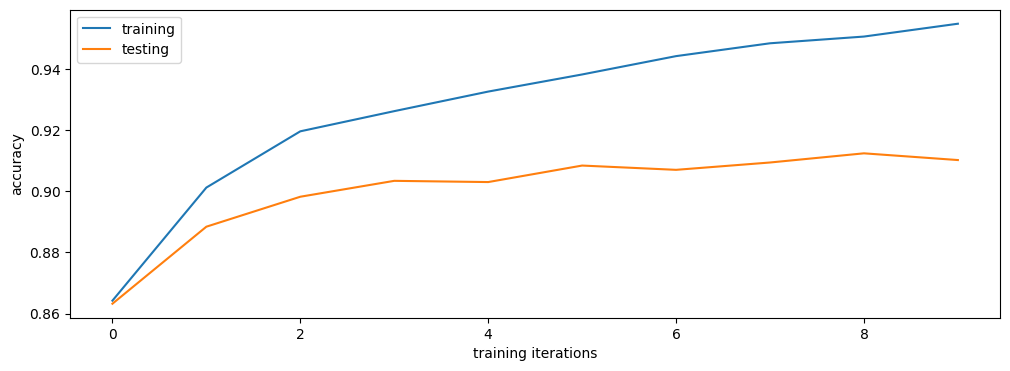

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category

network = Net()

# create the learning rule
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

In [ ]:
import torchvision

plotting_train = []
plotting_test = []


for i  in range(5):
    network = Net()
    optimizer = optim.SGD(network.parameters(),
                      lr=0.1,
                      momentum=0.5)

    accuracy_train = []
    accuracy_test = []


    for i in range(10):
        continue_training()

    #plotting_train[i] = plotting_train.append(accuracy_train)
    #plotting_test[i] = plotting_test.append(accuracy_test)
    plotting_train.append(accuracy_train)
    plotting_test.append(accuracy_test)



print(plotting_train)
print(plotting_test)



<ipython-input-10-c9dd8eba8e90>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8637999892234802
Iteration 1 Testing accuracy: 0.8574000000953674
Iteration 2 Training accuracy: 0.9017999768257141
Iteration 2 Testing accuracy: 0.8830000162124634
Iteration 3 Training accuracy: 0.9160000085830688
Iteration 3 Testing accuracy: 0.8925999999046326
Iteration 4 Training accuracy: 0.9232000112533569
Iteration 4 Testing accuracy: 0.900600016117096
Iteration 5 Training accuracy: 0.9305999875068665
Iteration 5 Testing accuracy: 0.9046000242233276
Iteration 6 Training accuracy: 0.9355999827384949
Iteration 6 Testing accuracy: 0.9057999849319458
Iteration 7 Training accuracy: 0.9401999711990356
Iteration 7 Testing accuracy: 0.9064000248908997
Iteration 8 Training accuracy: 0.944599986076355
Iteration 8 Testing accuracy: 0.9082000255584717
Iteration 9 Training accuracy: 0.9458000063896179
Iteration 9 Testing accuracy: 0.9083999991416931
Iteration 10 Training accuracy: 0.9498000144958496
Iteration 10 Testing accuracy: 0.9103999733924866
Iteration 

[[0.8637999892234802, 0.9017999768257141, 0.9160000085830688, 0.9232000112533569, 0.9305999875068665, 0.9355999827384949, 0.9401999711990356, 0.944599986076355, 0.9458000063896179, 0.9498000144958496], [0.8546000123023987, 0.9025999903678894, 0.9157999753952026, 0.9246000051498413, 0.9319999814033508, 0.9387999773025513, 0.9431999921798706, 0.946399986743927, 0.9509999752044678, 0.9535999894142151], [0.8597999811172485, 0.8996000289916992, 0.9133999943733215, 0.9240000247955322, 0.9315999746322632, 0.9369999766349792, 0.9391999840736389, 0.9435999989509583, 0.9495999813079834, 0.9524000287055969], [0.8539999723434448, 0.9003999829292297, 0.9136000275611877, 0.9243999719619751, 0.930400013923645, 0.9345999956130981, 0.9401999711990356, 0.9440000057220459, 0.9467999935150146, 0.9503999948501587], [0.8592000007629395, 0.9017999768257141, 0.9161999821662903, 0.9258000254631042, 0.9333999752998352, 0.9380000233650208, 0.9435999989509583, 0.9467999935150146, 0.9484000205993652, 0.95340001583

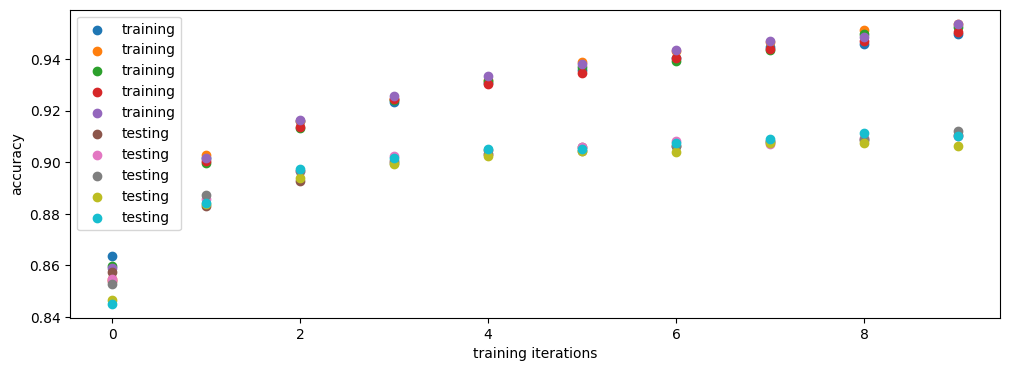

In [ ]:
#plotting_train = [[0.8528000116348267, 0.8988000154495239, 0.9143999814987183, 0.9251999855041504, 0.9315999746322632, 0.9362000226974487, 0.9416000247001648, 0.9462000131607056, 0.9506000280380249, 0.9538000226020813], [0.8569999933242798, 0.8996000289916992, 0.9169999957084656, 0.9233999848365784, 0.9318000078201294, 0.9380000233650208, 0.9413999915122986, 0.9467999935150146, 0.9503999948501587, 0.9539999961853027], [0.8569999933242798, 0.902400016784668, 0.9161999821662903, 0.9259999990463257, 0.9336000084877014, 0.9377999901771545, 0.9426000118255615, 0.9477999806404114, 0.9520000219345093, 0.9553999900817871], [0.8579999804496765, 0.9016000032424927, 0.9156000018119812, 0.9247999787330627, 0.9336000084877014, 0.9372000098228455, 0.942799985408783, 0.9473999738693237, 0.9513999819755554, 0.9549999833106995], [0.8537999987602234, 0.9014000296592712, 0.9165999889373779, 0.9264000058174133, 0.9330000281333923, 0.9372000098228455, 0.9431999921798706, 0.9470000267028809, 0.949999988079071, 0.9538000226020813]]
print(plotting_train)
print(plotting_test)
x=np.arange(10)

plt.figure(figsize=(12,4))
plt.scatter(x, plotting_train[0], label='training')
plt.scatter(x, plotting_train[1], label='training')
plt.scatter(x, plotting_train[2], label='training')
plt.scatter(x, plotting_train[3], label='training')
plt.scatter(x, plotting_train[4], label='training')



plt.scatter(x, plotting_test[0], label='testing')
plt.scatter(x, plotting_test[1], label='testing')
plt.scatter(x, plotting_test[2], label='testing')
plt.scatter(x, plotting_test[3], label='testing')
plt.scatter(x, plotting_test[4], label='testing')

plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#print(plotting_train[0][0])
i=0
training_averages=[]
training_sum = 0
for i in range(10):
  for j in range(5):
    #print(plotting_train[j][i])
    training_sum += plotting_train[j][i]

  training_averages.append(training_sum/len(plotting_train))

    #training_averages+= plotting_train[i][j]


print(training_averages)

print(plotting_test)

[0.8582799911499024, 1.7595199823379517, 2.674519979953766, 3.598919987678528, 4.53051997423172, 5.467319965362549, 6.408599948883056, 7.353679943084717, 8.301999938488006, 9.25391994714737]
[[0.8574000000953674, 0.8830000162124634, 0.8925999999046326, 0.900600016117096, 0.9046000242233276, 0.9057999849319458, 0.9064000248908997, 0.9082000255584717, 0.9083999991416931, 0.9103999733924866], [0.8547999858856201, 0.8858000040054321, 0.8966000080108643, 0.902400016784668, 0.9031999707221985, 0.9057999849319458, 0.9082000255584717, 0.9071999788284302, 0.9093999862670898, 0.9101999998092651], [0.8528000116348267, 0.8871999979019165, 0.8966000080108643, 0.8998000025749207, 0.9031999707221985, 0.90420001745224, 0.9061999917030334, 0.907800018787384, 0.9088000059127808, 0.9121999740600586], [0.8465999960899353, 0.8840000033378601, 0.8938000202178955, 0.899399995803833, 0.9021999835968018, 0.9043999910354614, 0.9038000106811523, 0.9074000120162964, 0.9074000120162964, 0.9061999917030334], [0.845

In [ ]:
accuracy_train1 = accuracy_train
accuracy_test1 = accuracy_test
print(accuracy_train1);print(accuracy_test1)

[0.8561999797821045, 0.900600016117096, 0.9146000146865845, 0.9246000051498413, 0.9312000274658203, 0.9372000098228455, 0.9409999847412109, 0.946399986743927, 0.9513999819755554, 0.9539999961853027]
[0.8471999764442444, 0.8845999836921692, 0.8930000066757202, 0.8989999890327454, 0.9017999768257141, 0.9056000113487244, 0.906000018119812, 0.9093999862670898, 0.9120000004768372, 0.9101999998092651]


In [ ]:
[0.8561999797821045, 0.900600016117096, 0.9146000146865845, 0.9246000051498413, 0.9312000274658203, 0.9372000098228455, 0.9409999847412109, 0.946399986743927, 0.9513999819755554, 0.9539999961853027]
[0.8471999764442444, 0.8845999836921692, 0.8930000066757202, 0.8989999890327454, 0.9017999768257141, 0.9056000113487244, 0.906000018119812, 0.9093999862670898, 0.9120000004768372, 0.9101999998092651]

In [ ]:
accuracy_train2 = accuracy_train
accuracy_test2 = accuracy_test
print(accuracy_train2);print(accuracy_test2)


[0.8561999797821045, 0.8999999761581421, 0.9172000288963318, 0.9247999787330627, 0.9309999942779541, 0.9369999766349792, 0.9405999779701233, 0.946399986743927, 0.9502000212669373, 0.9559999704360962]
[0.8479999899864197, 0.883400022983551, 0.896399974822998, 0.902999997138977, 0.9053999781608582, 0.9067999720573425, 0.9088000059127808, 0.9093999862670898, 0.9129999876022339, 0.9129999876022339]


In [ ]:
[0.8561999797821045, 0.8999999761581421, 0.9172000288963318, 0.9247999787330627, 0.9309999942779541, 0.9369999766349792, 0.9405999779701233, 0.946399986743927, 0.9502000212669373, 0.9559999704360962]
[0.8479999899864197, 0.883400022983551, 0.896399974822998, 0.902999997138977, 0.9053999781608582, 0.9067999720573425, 0.9088000059127808, 0.9093999862670898, 0.9129999876022339, 0.9129999876022339]

In [ ]:
accuracy_train3 = accuracy_train
accuracy_test3 = accuracy_test
print(accuracy_train3);print(accuracy_test3)


[0.8597999811172485, 0.9028000235557556, 0.9154000282287598, 0.9282000064849854, 0.932200014591217, 0.9376000165939331, 0.9435999989509583, 0.948199987411499, 0.9491999745368958, 0.954800009727478]
[0.8568000197410583, 0.8889999985694885, 0.8974000215530396, 0.9031999707221985, 0.9093999862670898, 0.9106000065803528, 0.9111999869346619, 0.9125999808311462, 0.9128000140190125, 0.9156000018119812]


In [ ]:
[0.8597999811172485, 0.9028000235557556, 0.9154000282287598, 0.9282000064849854, 0.932200014591217, 0.9376000165939331, 0.9435999989509583, 0.948199987411499, 0.9491999745368958, 0.954800009727478]
[0.8568000197410583, 0.8889999985694885, 0.8974000215530396, 0.9031999707221985, 0.9093999862670898, 0.9106000065803528, 0.9111999869346619, 0.9125999808311462, 0.9128000140190125, 0.9156000018119812]

In [ ]:
accuracy_train4 = accuracy_train
accuracy_test4 = accuracy_test
print(accuracy_train4);print(accuracy_test4)


[0.8626000285148621, 0.8996000289916992, 0.9146000146865845, 0.9243999719619751, 0.9318000078201294, 0.9377999901771545, 0.9419999718666077, 0.9466000199317932, 0.9484000205993652, 0.9513999819755554]
[0.8511999845504761, 0.8830000162124634, 0.8935999870300293, 0.8999999761581421, 0.9035999774932861, 0.9070000052452087, 0.9079999923706055, 0.9071999788284302, 0.9110000133514404, 0.9107999801635742]


In [ ]:
[0.8626000285148621, 0.8996000289916992, 0.9146000146865845, 0.9243999719619751, 0.9318000078201294, 0.9377999901771545, 0.9419999718666077, 0.9466000199317932, 0.9484000205993652, 0.9513999819755554]
[0.8511999845504761, 0.8830000162124634, 0.8935999870300293, 0.8999999761581421, 0.9035999774932861, 0.9070000052452087, 0.9079999923706055, 0.9071999788284302, 0.9110000133514404, 0.9107999801635742]

In [ ]:
accuracy_train5 = accuracy_train
accuracy_test5 = accuracy_test
print(accuracy_train5);print(accuracy_test5)


[0.8641999959945679, 0.901199996471405, 0.9196000099182129, 0.9261999726295471, 0.9326000213623047, 0.9381999969482422, 0.9441999793052673, 0.9484000205993652, 0.9506000280380249, 0.954800009727478]
[0.8632000088691711, 0.8884000182151794, 0.8981999754905701, 0.9034000039100647, 0.902999997138977, 0.9083999991416931, 0.9070000052452087, 0.9093999862670898, 0.9124000072479248, 0.9101999998092651]


In [ ]:
[0.8641999959945679, 0.901199996471405, 0.9196000099182129, 0.9261999726295471, 0.9326000213623047, 0.9381999969482422, 0.9441999793052673, 0.9484000205993652, 0.9506000280380249, 0.954800009727478]
[0.8632000088691711, 0.8884000182151794, 0.8981999754905701, 0.9034000039100647, 0.902999997138977, 0.9083999991416931, 0.9070000052452087, 0.9093999862670898, 0.9124000072479248, 0.9101999998092651]

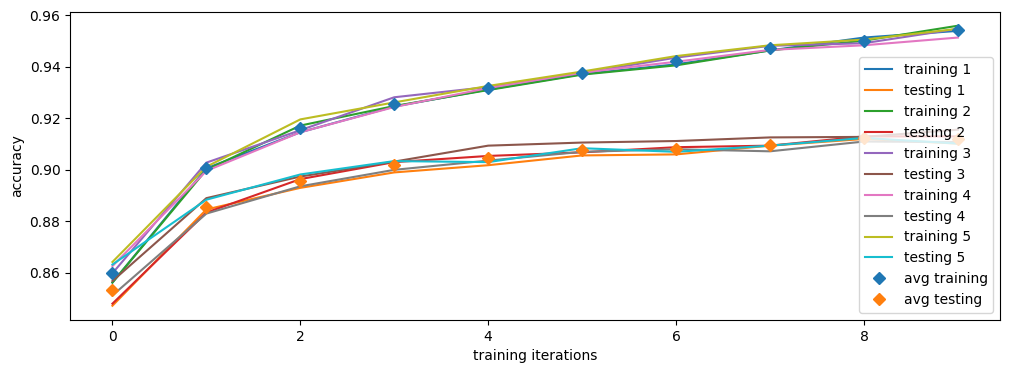

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(accuracy_train1, label='training 1')
plt.plot(accuracy_test1, label='testing 1')

plt.plot(accuracy_train2, label='training 2')
plt.plot(accuracy_test2, label='testing 2')

plt.plot(accuracy_train3, label='training 3')
plt.plot(accuracy_test3, label='testing 3')

plt.plot(accuracy_train4, label='training 4')
plt.plot(accuracy_test4, label='testing 4')

plt.plot(accuracy_train5, label='training 5')
plt.plot(accuracy_test5, label='testing 5')

average_training = [0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999]
average_testing = [0.85328   , 0.88568001, 0.89571999, 0.90171999, 0.90463998,
       0.90768   , 0.9082    , 0.90959998, 0.91224   , 0.91195999]


plt.plot(average_training, 'D', label='avg training')
plt.plot(average_testing, 'D', label='avg testing')


plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

In [ ]:
trainings = np.array([accuracy_train1, accuracy_train2, accuracy_train3, accuracy_train4, accuracy_train5])

testings = np.array([accuracy_test1, accuracy_test2, accuracy_test3, accuracy_test4, accuracy_test5])


average_training = [0,0,0,0,0]
average_testing = [0,0,0,0,0]

for i in range(5):
    average_training[i] = np.mean(trainings, axis=0)

for i in range(5):
    average_testing[i] = np.mean(testings, axis=0)


print(average_training)



print(average_testing)

[array([0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999]), array([0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999]), array([0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999]), array([0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999]), array([0.85979999, 0.90084001, 0.91628002, 0.92563999, 0.93176001,
       0.93756   , 0.94227998, 0.9472    , 0.94996001, 0.95419999])]
[array([0.85328   , 0.88568001, 0.89571999, 0.90171999, 0.90463998,
       0.90768   , 0.9082    , 0.90959998, 0.91224   , 0.91195999]), array([0.85328   , 0.88568001, 0.89571999, 0.90171999, 0.90463998,
       0.90768   , 0.9082    , 0.90959998, 0.91224   , 0.91195999]), array([0.85328   , 0.88568001, 0.89571999, 0.9

The accuracies are all slightly different due to alterations in weights from  backpropoation. Furthermore, each iteration of the training is done on randomized batches of 1000 samples, so odds are each run occurs on slightly different batches of samples in training and determining optimal weights.


**3. c) [1 mark]** Repeat question 3b varying the number of neurons in the hidden layer of the network.  The current value is 50.  Try it with 5, 10, 20, 50, and 100 neurons.  For each number of neurons, repeat five times and take the average (like in question 3b).  

- Plot the final testing accuracy on the y-axis and the number of neurons on the x-axis.  Note that to speed things up you can remove the testing computation from continue_training until the very end, since we only need the final testing score.


In [ ]:


plotting_train = []
plotting_test = []

for num_neurons in [5, 10, 20, 50, 100]:

  class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            # these will be learned
            self.fc1 = nn.Linear(784, num_neurons)   # the weights from the input to the new learned features (hidden layer)
            self.fc2 = nn.Linear(num_neurons, 10)    # the weights from the hidden layer to the output

        def forward(self, x):
            # the processing the network will do
            x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
            x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
            x = self.fc2(x)                 # apply the second set of weights
            return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category



  network = Net()

  for i  in range(5):
      network = Net()
      optimizer = optim.SGD(network.parameters(),
                        lr=0.1,
                        momentum=0.5)

      accuracy_train = []
      accuracy_test = []


      for i in range(10):
          continue_training()

      #plotting_train[i] = plotting_train.append(accuracy_train)
      #plotting_test[i] = plotting_test.append(accuracy_test)
      plotting_train.append(accuracy_train)
      plotting_test.append(accuracy_test)



print(plotting_train)
print(plotting_test)

<ipython-input-50-7d7d841f8c03>:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.7675999999046326
Iteration 1 Testing accuracy: 0.7720000147819519
Iteration 2 Training accuracy: 0.8565999865531921
Iteration 2 Testing accuracy: 0.828000009059906
Iteration 3 Training accuracy: 0.8795999884605408
Iteration 3 Testing accuracy: 0.8479999899864197
Iteration 4 Training accuracy: 0.890999972820282
Iteration 4 Testing accuracy: 0.8569999933242798
Iteration 5 Training accuracy: 0.8970000147819519
Iteration 5 Testing accuracy: 0.8614000082015991
Iteration 6 Training accuracy: 0.9016000032424927
Iteration 6 Testing accuracy: 0.8677999973297119
Iteration 7 Training accuracy: 0.9047999978065491
Iteration 7 Testing accuracy: 0.8700000047683716
Iteration 8 Training accuracy: 0.9088000059127808
Iteration 8 Testing accuracy: 0.8722000122070312
Iteration 9 Training accuracy: 0.9107999801635742
Iteration 9 Testing accuracy: 0.8718000054359436
Iteration 10 Training accuracy: 0.9132000207901001
Iteration 10 Testing accuracy: 0.875
Iteration 1 Training ac

In [ ]:
plt.figure(figsize=(12,4))

i=0
for i in range(25):
  plt.plt(plotting_train[0])


#plt.scatter(x, plotting_train[0], label='training')
#plt.scatter(x, plotting_train[1], label='training')
plt.scatter(x, plotting_train[2], label='training')
plt.scatter(x, plotting_train[3], label='training')
plt.scatter(x, plotting_train[4], label='training')



plt.scatter(x, plotting_test[0], label='testing')
plt.scatter(x, plotting_test[1], label='testing')
plt.scatter(x, plotting_test[2], label='testing')
plt.scatter(x, plotting_test[3], label='testing')
plt.scatter(x, plotting_test[4], label='testing')

plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

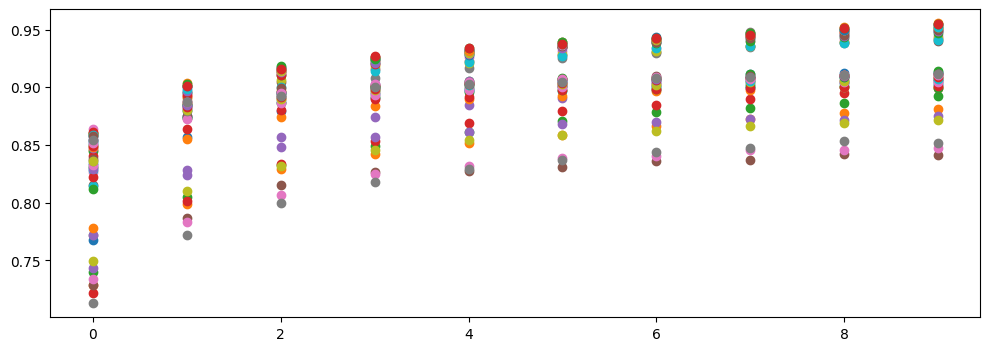

In [ ]:
plt.figure(figsize=(12,4))
x = np.arange(10)
i=0
for i in range(24):
  plt.scatter(x, plotting_train[i])

i=0
for i in range(24):
  plt.scatter(x, plotting_test[i])

0.9132000207901001
[0.9132000207901001, 0.8812000155448914, 0.8920000195503235, 0.899399995803833, 0.9053999781608582, 0.9399999976158142, 0.9444000124931335, 0.9417999982833862, 0.9423999786376953, 0.9408000111579895, 0.9488000273704529, 0.9508000016212463, 0.9467999935150146, 0.951200008392334, 0.9485999941825867, 0.9495999813079834, 0.9538000226020813, 0.9534000158309937, 0.9526000022888184, 0.9524000287055969, 0.9544000029563904, 0.9553999900817871, 0.9545999765396118, 0.9544000029563904, 0.9570000171661377]
0.9551599979400635
[0.8982400059700012, 0.9418799996376037, 0.9492400050163269, 0.9523600101470947, 0.9551599979400635]


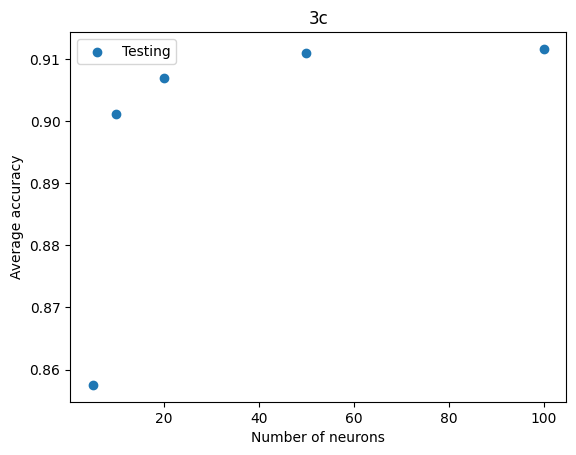

In [ ]:
neurons = [5, 10, 20, 50, 100]
plotting_train = [[0.7675999999046326, 0.8565999865531921, 0.8795999884605408, 0.890999972820282, 0.8970000147819519, 0.9016000032424927, 0.9047999978065491, 0.9088000059127808, 0.9107999801635742, 0.9132000207901001], [0.7289999723434448, 0.798799991607666, 0.8288000226020813, 0.8424000144004822, 0.8519999980926514, 0.859000027179718, 0.8659999966621399, 0.8723999857902527, 0.8776000142097473, 0.8812000155448914], [0.739799976348877, 0.8047999739646912, 0.8325999975204468, 0.8492000102996826, 0.8611999750137329, 0.8709999918937683, 0.8781999945640564, 0.8823999762535095, 0.8866000175476074, 0.8920000195503235], [0.7214000225067139, 0.8014000058174133, 0.8331999778747559, 0.8533999919891357, 0.8687999844551086, 0.8794000148773193, 0.8848000168800354, 0.8902000188827515, 0.8948000073432922, 0.899399995803833], [0.743399977684021, 0.8240000009536743, 0.8565999865531921, 0.8737999796867371, 0.8845999836921692, 0.8906000256538391, 0.8971999883651733, 0.899399995803833, 0.90420001745224, 0.9053999781608582], [0.8151999711990356, 0.8844000101089478, 0.90420001745224, 0.9154000282287598, 0.9225999712944031, 0.9276000261306763, 0.9308000206947327, 0.9355999827384949, 0.9395999908447266, 0.9399999976158142], [0.826200008392334, 0.8916000127792358, 0.9111999869346619, 0.9228000044822693, 0.9261999726295471, 0.9315999746322632, 0.9341999888420105, 0.9399999976158142, 0.9416000247001648, 0.9444000124931335], [0.7720000147819519, 0.873199999332428, 0.895799994468689, 0.9079999923706055, 0.9168000221252441, 0.9254000186920166, 0.9300000071525574, 0.9345999956130981, 0.9381999969482422, 0.9417999982833862], [0.8309999704360962, 0.8907999992370605, 0.9061999917030334, 0.91839998960495, 0.9211999773979187, 0.9283999800682068, 0.9318000078201294, 0.9354000091552734, 0.9395999908447266, 0.9423999786376953], [0.8281999826431274, 0.8802000284194946, 0.9002000093460083, 0.9143999814987183, 0.9215999841690063, 0.9273999929428101, 0.9337999820709229, 0.9354000091552734, 0.9380000233650208, 0.9408000111579895], [0.8335999846458435, 0.8953999876976013, 0.9138000011444092, 0.923799991607666, 0.9279999732971191, 0.9354000091552734, 0.9395999908447266, 0.942799985408783, 0.9458000063896179, 0.9488000273704529], [0.8456000089645386, 0.8925999999046326, 0.9132000207901001, 0.9240000247955322, 0.9294000267982483, 0.9350000023841858, 0.9412000179290771, 0.9441999793052673, 0.9480000138282776, 0.9508000016212463], [0.8450000286102295, 0.8962000012397766, 0.9110000133514404, 0.9214000105857849, 0.9290000200271606, 0.9351999759674072, 0.9383999705314636, 0.9404000043869019, 0.9437999725341797, 0.9467999935150146], [0.8402000069618225, 0.8934000134468079, 0.9107999801635742, 0.920199990272522, 0.930400013923645, 0.9345999956130981, 0.9405999779701233, 0.9448000192642212, 0.9480000138282776, 0.951200008392334], [0.847000002861023, 0.8970000147819519, 0.9128000140190125, 0.9205999970436096, 0.928600013256073, 0.9337999820709229, 0.9394000172615051, 0.9440000057220459, 0.944599986076355, 0.9485999941825867], [0.8596000075340271, 0.901199996471405, 0.9147999882698059, 0.925000011920929, 0.9318000078201294, 0.9355999827384949, 0.9394000172615051, 0.9426000118255615, 0.9455999732017517, 0.9495999813079834], [0.8636000156402588, 0.900600016117096, 0.9143999814987183, 0.9243999719619751, 0.9314000010490417, 0.9362000226974487, 0.9422000050544739, 0.9459999799728394, 0.949999988079071, 0.9538000226020813], [0.854200005531311, 0.9007999897003174, 0.9172000288963318, 0.9261999726295471, 0.9326000213623047, 0.9377999901771545, 0.9416000247001648, 0.9476000070571899, 0.9498000144958496, 0.9534000158309937], [0.8583999872207642, 0.9010000228881836, 0.9142000079154968, 0.925000011920929, 0.9300000071525574, 0.9372000098228455, 0.9408000111579895, 0.9453999996185303, 0.9491999745368958, 0.9526000022888184], [0.8519999980926514, 0.8988000154495239, 0.9160000085830688, 0.9241999983787537, 0.9318000078201294, 0.9372000098228455, 0.9413999915122986, 0.946399986743927, 0.9503999948501587, 0.9524000287055969], [0.8575999736785889, 0.901199996471405, 0.9165999889373779, 0.9258000254631042, 0.9323999881744385, 0.9395999908447266, 0.9431999921798706, 0.9470000267028809, 0.9495999813079834, 0.9544000029563904], [0.8605999946594238, 0.9035999774932861, 0.9156000018119812, 0.9265999794006348, 0.9318000078201294, 0.9387999773025513, 0.9422000050544739, 0.9473999738693237, 0.9517999887466431, 0.9553999900817871], [0.8601999878883362, 0.9028000235557556, 0.9187999963760376, 0.9247999787330627, 0.9336000084877014, 0.9387999773025513, 0.9430000185966492, 0.9472000002861023, 0.951200008392334, 0.9545999765396118], [0.8614000082015991, 0.9010000228881836, 0.9157999753952026, 0.9272000193595886, 0.9336000084877014, 0.9372000098228455, 0.942799985408783, 0.9455999732017517, 0.9509999752044678, 0.9544000029563904], [0.8677999973297119, 0.9067999720573425, 0.9196000099182129, 0.9297999739646912, 0.9358000159263611, 0.9412000179290771, 0.9473999738693237, 0.9502000212669373, 0.9553999900817871, 0.9570000171661377]]
plotting_test = [[0.7720000147819519, 0.828000009059906, 0.8479999899864197, 0.8569999933242798, 0.8614000082015991, 0.8677999973297119, 0.8700000047683716, 0.8722000122070312, 0.8718000054359436, 0.875], [0.7289999723434448, 0.7868000268936157, 0.8154000043869019, 0.826200008392334, 0.8277999758720398, 0.8307999968528748, 0.8363999724388123, 0.8371999859809875, 0.8420000076293945, 0.8414000272750854], [0.7337999939918518, 0.7829999923706055, 0.8069999814033508, 0.8252000212669373, 0.8317999839782715, 0.8384000062942505, 0.8406000137329102, 0.8456000089645386, 0.8453999757766724, 0.8471999764442444], [0.7128000259399414, 0.7716000080108643, 0.7993999719619751, 0.8180000185966492, 0.8294000029563904, 0.8367999792098999, 0.8435999751091003, 0.8471999764442444, 0.8533999919891357, 0.8519999980926514], [0.7495999932289124, 0.8098000288009644, 0.8320000171661377, 0.8452000021934509, 0.8543999791145325, 0.8586000204086304, 0.8622000217437744, 0.8661999702453613, 0.8686000108718872, 0.871999979019165], [0.8144000172615051, 0.8745999932289124, 0.8913999795913696, 0.8971999883651733, 0.8971999883651733, 0.8970000147819519, 0.8998000025749207, 0.9002000093460083, 0.9002000093460083, 0.9016000032424927], [0.8307999968528748, 0.8751999735832214, 0.8873999714851379, 0.8942000269889832, 0.8985999822616577, 0.8999999761581421, 0.9007999897003174, 0.9031999707221985, 0.9035999774932861, 0.9035999774932861], [0.7778000235557556, 0.855400025844574, 0.8744000196456909, 0.8835999965667725, 0.8898000121116638, 0.8925999999046326, 0.8970000147819519, 0.897599995136261, 0.8999999761581421, 0.9002000093460083], [0.8119999766349792, 0.873199999332428, 0.8859999775886536, 0.8916000127792358, 0.895799994468689, 0.8978000283241272, 0.8988000154495239, 0.9007999897003174, 0.9007999897003174, 0.8992000222206116], [0.8217999935150146, 0.8633999824523926, 0.8799999952316284, 0.8894000053405762, 0.8916000127792358, 0.897599995136261, 0.8981999754905701, 0.8989999890327454, 0.9002000093460083, 0.9007999897003174], [0.8288000226020813, 0.8817999958992004, 0.8944000005722046, 0.9007999897003174, 0.9039999842643738, 0.9064000248908997, 0.9088000059127808, 0.9085999727249146, 0.9093999862670898, 0.9074000120162964], [0.8381999731063843, 0.8754000067710876, 0.8902000188827515, 0.8960000276565552, 0.900600016117096, 0.901199996471405, 0.9025999903678894, 0.9049999713897705, 0.9065999984741211, 0.9061999917030334], [0.8321999907493591, 0.8723999857902527, 0.8862000107765198, 0.8934000134468079, 0.8971999883651733, 0.900600016117096, 0.9034000039100647, 0.906000018119812, 0.9046000242233276, 0.9043999910354614], [0.8363999724388123, 0.8795999884605408, 0.8930000066757202, 0.9010000228881836, 0.9035999774932861, 0.9039999842643738, 0.907800018787384, 0.907800018787384, 0.9089999794960022, 0.9089999794960022], [0.8357999920845032, 0.8805999755859375, 0.8898000121116638, 0.8974000215530396, 0.9017999768257141, 0.902999997138977, 0.9016000032424927, 0.9047999978065491, 0.9049999713897705, 0.9075999855995178], [0.8586000204086304, 0.8840000033378601, 0.894599974155426, 0.8996000289916992, 0.9020000100135803, 0.9049999713897705, 0.906000018119812, 0.9057999849319458, 0.9089999794960022, 0.9070000052452087], [0.8533999919891357, 0.8849999904632568, 0.895799994468689, 0.9003999829292297, 0.902999997138977, 0.9074000120162964, 0.9070000052452087, 0.9114000201225281, 0.9120000004768372, 0.9125999808311462], [0.8483999967575073, 0.8862000107765198, 0.896399974822998, 0.9014000296592712, 0.9039999842643738, 0.9067999720573425, 0.9083999991416931, 0.9079999923706055, 0.9106000065803528, 0.9115999937057495], [0.8500000238418579, 0.8855999708175659, 0.8948000073432922, 0.9002000093460083, 0.9057999849319458, 0.907800018787384, 0.9083999991416931, 0.9118000268936157, 0.9092000126838684, 0.9142000079154968], [0.849399983882904, 0.8831999897956848, 0.8913999795913696, 0.8988000154495239, 0.9028000235557556, 0.9039999842643738, 0.9065999984741211, 0.9083999991416931, 0.909600019454956, 0.9092000126838684], [0.8551999926567078, 0.8849999904632568, 0.8960000276565552, 0.902400016784668, 0.9052000045776367, 0.9052000045776367, 0.9067999720573425, 0.9075999855995178, 0.9097999930381775, 0.9118000268936157], [0.8575999736785889, 0.8877999782562256, 0.8989999890327454, 0.9021999835968018, 0.9046000242233276, 0.9067999720573425, 0.9097999930381775, 0.9100000262260437, 0.9110000133514404, 0.9118000268936157], [0.8519999980926514, 0.8867999911308289, 0.8953999876976013, 0.9028000235557556, 0.90420001745224, 0.9071999788284302, 0.9089999794960022, 0.9070000052452087, 0.9101999998092651, 0.9106000065803528], [0.854200005531311, 0.8867999911308289, 0.8921999931335449, 0.9003999829292297, 0.9031999707221985, 0.9046000242233276, 0.907800018787384, 0.9092000126838684, 0.9101999998092651, 0.9115999937057495], [0.8565999865531921, 0.8862000107765198, 0.8978000283241272, 0.9034000039100647, 0.9053999781608582, 0.907800018787384, 0.9089999794960022, 0.9111999869346619, 0.9114000201225281, 0.9124000072479248]]

print(plotting_train[0][9])
#print(plotting_train[0:5][9])
#print(plotting_test)

accuracies = []
for i in range(25):
    accuracies.append(plotting_train[i][9])


print(accuracies)

avg5 = sum(accuracies[0:5])/5
print(avg100)
avg10 = sum(accuracies[5:10])/5
avg20 = sum(accuracies[10:15])/5
avg50 = sum(accuracies[15:20])/5
avg100 = sum(accuracies[20:25])/5

training_averages=[avg5,avg10,avg20,avg50,avg100]
print(training_averages)

testing_accuracies = []
for i in range(25):
    testing_accuracies.append(plotting_test[i][9])

avgt5 = sum(testing_accuracies[0:5])/5
avgt10 = sum(testing_accuracies[5:10])/5
avgt20 = sum(testing_accuracies[10:15])/5
avgt50 = sum(testing_accuracies[15:20])/5
avgt100 = sum(testing_accuracies[20:25])/5

testing_averages=[avgt5, avgt10, avgt20, avgt50, avgt100]

plt.figure()
#plt.scatter(neurons, training_averages, label ='Training')
plt.scatter(neurons, testing_averages, label ='Testing')
plt.xlabel('Number of neurons')
plt.ylabel('Average accuracy')
plt.title('3c')

plt.legend()


**3. d) [2 marks]** Now we will add a convolution layer to our network.  The following network adds two convolution layers before two normal neural network layers.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
```

The following code can be used to plot the learned features in the first layer:
```python
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()
```

- Train the model through 40 iterations and generate a plot of training and testing accuracy over time.
- Does this perform better or worse than the previous models in this assignment?
- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?
- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

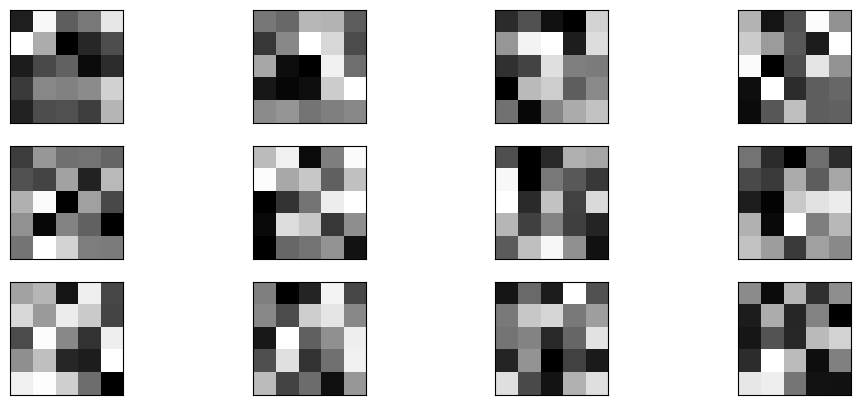

<ipython-input-43-105fa984c496>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 42 Training accuracy: 0.0957999974489212
Iteration 42 Testing accuracy: 0.10440000146627426
Iteration 43 Training accuracy: 0.0957999974489212
Iteration 43 Testing accuracy: 0.10440000146627426
Iteration 44 Training accuracy: 0.0957999974489212
Iteration 44 Testing accuracy: 0.10440000146627426


KeyboardInterrupt: 

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)


network = Net()

plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

for i in range(4):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()


<ipython-input-48-a647a0d5e1d2>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.6687999963760376
Iteration 1 Testing accuracy: 0.5952000021934509
Iteration 2 Training accuracy: 0.9318000078201294
Iteration 2 Testing accuracy: 0.8855999708175659
Iteration 3 Training accuracy: 0.953000009059906
Iteration 3 Testing accuracy: 0.925599992275238
Iteration 4 Training accuracy: 0.9697999954223633
Iteration 4 Testing accuracy: 0.9401999711990356
Iteration 5 Training accuracy: 0.977400004863739
Iteration 5 Testing accuracy: 0.9453999996185303
Iteration 6 Training accuracy: 0.9828000068664551
Iteration 6 Testing accuracy: 0.9524000287055969
Iteration 7 Training accuracy: 0.9886000156402588
Iteration 7 Testing accuracy: 0.9535999894142151
Iteration 8 Training accuracy: 0.993399977684021
Iteration 8 Testing accuracy: 0.9589999914169312
Iteration 9 Training accuracy: 0.995199978351593
Iteration 9 Testing accuracy: 0.9588000178337097
Iteration 10 Training accuracy: 0.9976000189781189
Iteration 10 Testing accuracy: 0.9553999900817871
Iteration 11 

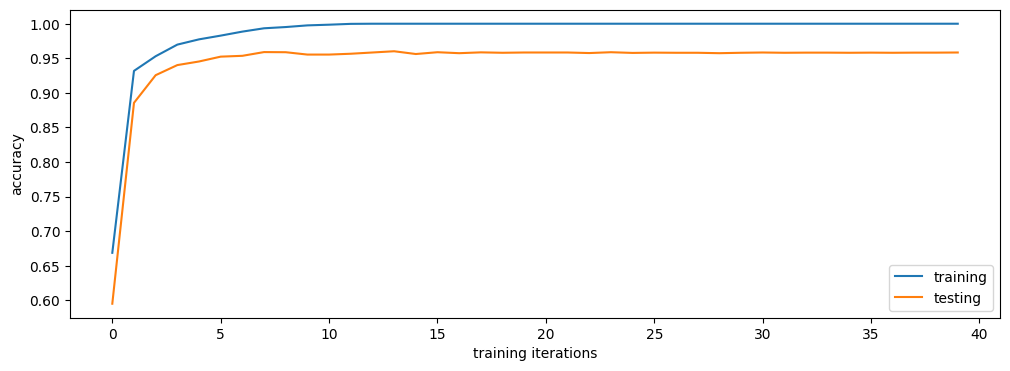

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)


network = Net()

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                          batch_size=1000, shuffle=True)


# create the learning rule
optimizer = optim.SGD(network.parameters(),
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule

            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(40):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

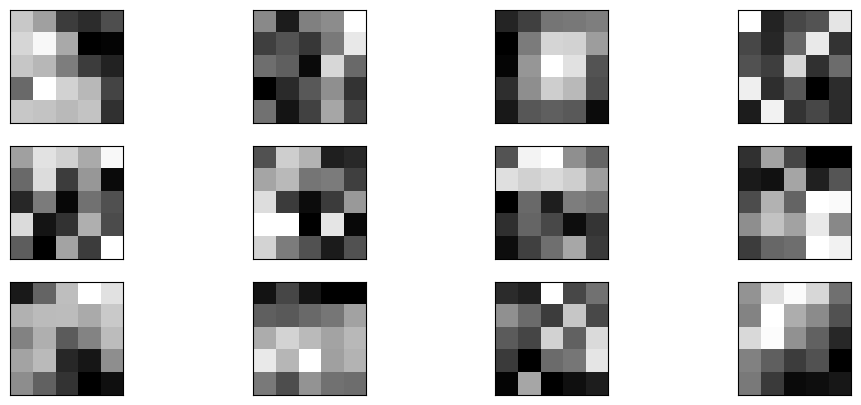

In [ ]:
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

This model works better than the prior models. This approach is advantageous in the sense that the local receptive fields align from a biological standpoint and there is a hierachy of layers to abstract features that coincide with reductive operations (convolutional pooling) at certain levels. The fallbacks are that overfitting is encountered and there is an inability to account for connections between neurons within each singular layer, nor is there the ability to normalize in the two convolutional layers or a method of changing the inputs. This rigidity in training deviates from true biological learning.

The overfitting in particular is also an issue where the the training accuracy maxes out at 13th iteration causing the testing accuracy maxes out at 95.8%


The plotted features from the first convolution layer produces the abstraction of the most basic features from the input - globally non-specific pixels of greyscale color from inputs which allude to highly specific (so nonintegrated) features for particular parameters (color, orientation, depth, texture, etc.). I would say this is a pretty accurate representation of the V1 functionality since it too is specific for its preferred stimulus in an orientation-specific manner from a given input.

**BONUS [1 mark]** Try to improve the neural network.  You want to get the best testing accuracy you can.  Try at least two different approaches and report your results.

In [ ]:
#https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d
#https://elitedatascience.com/overfitting-in-machine-learning
#while I did not get this far for the asgt due date, it would be interesting to try implementing some underfitting techniques from the sources above
#such as batching the dataset or early stopping (training only up until noise is encountered in the dataset)